<a href="https://colab.research.google.com/github/Atifa14/EDGE-project-09/blob/main/Final_Project09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print ("Atifa")

Atifa


#Data Collection and Storage


In [3]:
import csv

In [4]:
with open("student_data.csv", "w", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Student ID", "Student Name", "Subject", "Score", "Attendance Percentage", "Assignment Completion"])

In [5]:
def add_record():

  with open("student_data.csv", "a") as file:
      writer = csv.writer(file)


      student_id = input("Enter Student ID : ")
      student_name = input("Enter Student Name: ")
      subject = input("Enter Subject: ")
      score = input("Enter Score: ")
      attendance = input("Enter Attendance Percentage: ")
      assignment = input("Enter Assignment Completion (Yes/No): ")
      writer.writerow([student_id, student_name, subject, score, attendance, assignment])

      file.close()

      print("Data written to student_data.csv")

In [6]:
with open("student_data.csv", "r") as file:
    print(file.read())

Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion



**Interactive Console**

In [7]:
while True:
  print("Menu")
  print("1. Add Record")
  print("2. Search Record")
  print("3. Update Record")
  print("4. Delete Record")
  print("5. Exit")
  choice = input("Enter your choice: (1-5) ")

  if choice == "1":
    add_record()
  if choice == "2":
    search_record()
  if choice == "3":
    update_record()
  if choice == "4":
    delete_record()
  if choice == "5":
    exit()
    break

Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 001
Enter Student Name: Atifa
Enter Subject: STA
Enter Score: 89
Enter Attendance Percentage: 90
Enter Assignment Completion (Yes/No): Yes
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 001
Enter Student Name: Atifa
Enter Subject: MAT
Enter Score: 75
Enter Attendance Percentage: 80
Enter Assignment Completion (Yes/No): Yes
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter Student ID : 002
Enter Student Name: Kafi
Enter Subject: SWE
Enter Score: 90
Enter Attendance Percentage: 100
Enter Assignment Completion (Yes/No): No
Data written to student_data.csv
Menu
1. Add Record
2. Search Record
3. Update Record
4. Delete Record
5. Exit
Enter your choice: (1-5) 1
Enter St

#Read CSV

In [1]:
def getinfo(student_id):
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
      if row[0] == student_id:
       return row

In [4]:
print(getinfo("001"))

['001', 'Atifa', 'STA', '89', '90', 'Yes']


Modify score

In [5]:
def modify_score():
  student_id = input("Enter Student ID to modify: ")
  subject= input("Enter Subject to modify: ")
  with open("student_data.csv", "r") as file:
    reader = csv.reader(file)
    data= list(reader)
    for row in data:
      if row[0] == student_id and row[2] == subject:
        row[3] = input("Enter new score: ")
        break
        print("Subject not found")
        break
  with open("student_data.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(data)
    print("Score modified successfully")

In [6]:
while True:
  print("Menu")
  print("1. Modify Score")
  print("2. Exit")
  choice = input("Enter your choice: (1-2) ")

  if choice == "1":
    modify_score()
  if choice == "2":
    exit()
    break

Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 1
Enter Student ID to modify: 003
Enter Subject to modify: BBA
Enter new score: 54
Score modified successfully
Menu
1. Modify Score
2. Exit
Enter your choice: (1-2) 2


Saving to drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import shutil
# shutil.copy('studentinfo.csv', '/content/drive/My Drive/studentinfo.csv')

#Data Analysis and Manipulation

mean,min and max

In [13]:
import pandas as pd

In [14]:
data= pd.read_csv("student_data.csv")

In [15]:
data

,Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
0,1,Atifa,STA,89,90,Yes
1,1,Atifa,MAT,75,80,Yes
2,2,Kafi,SWE,90,100,No
3,2,Kafi,MAT,85,80,Yes
4,3,Nabisha,BNG,65,75,No
5,3,Nabisha,BBA,54,60,No
6,4,Samiya,EEE,64,65,Yes
7,4,Samiya,PHY,65,60,No
8,5,Mofiz,MAT,82,60,Yes


In [16]:
student_stats= data.groupby(['Student ID','Student Name'])['Score'].agg(['mean', 'max', 'min'])
student_stats = student_stats.rename(columns={
    'mean': 'Average Score',
    'max': 'Highest Score',
    'min': 'Lowest Score'
})
print(student_stats)

                         Average Score  Highest Score  Lowest Score
Student ID Student Name                                            
1          Atifa                  82.0             89            75
2          Kafi                   87.5             90            85
3          Nabisha                59.5             65            54
4          Samiya                 64.5             65            64
5          Mofiz                  82.0             82            82


Attendence <75% or missing assignments

In [17]:
low_attendence_or_missing_assignments = data[(data['Attendance Percentage'] < 75) | (data['Assignment Completion'] == 'No')]
print(low_attendence_or_missing_assignments)

   Student ID Student Name Subject  Score  Attendance Percentage  \
2           2         Kafi     SWE     90                    100   
4           3      Nabisha     BNG     65                     75   
5           3      Nabisha     BBA     54                     60   
6           4       Samiya     EEE     64                     65   
7           4       Samiya     PHY     65                     60   
8           5        Mofiz     MAT     82                     60   

  Assignment Completion  
2                    No  
4                    No  
5                    No  
6                   Yes  
7                    No  
8                   Yes  


Filter students failing a subject

In [18]:
data['Score'] = pd.to_numeric(data['Score'])
failed_students = data[(data['Score'] < 80) & (data['Subject'] == 'OCG')][['Student ID','Student Name','Subject']]
print(failed_students)

Empty DataFrame
Columns: [Student ID, Student Name, Subject]
Index: []


Convert score to integer

In [19]:
if data['Score'].dtype == 'str':
  data['Score'] = data['Score'].astype(int)
  print("Score is converted to an integer type.")
  if data['Score'].dtype == 'int64' or data['Score'].dtype == 'int32':
    print("Score is converted to an integer type.")

#Visualization

In [20]:
import matplotlib.pyplot as plt

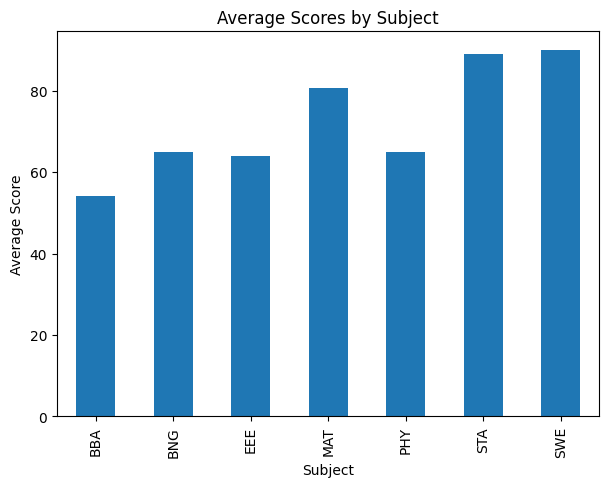

In [23]:
average_scores = data.groupby('Subject')['Score'].mean()

average_scores.plot(kind='bar', figsize=(7, 5))
plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

Pie chart of attendence percentage categories

In [24]:
import matplotlib.pyplot as plt

In [25]:
import pandas as pd

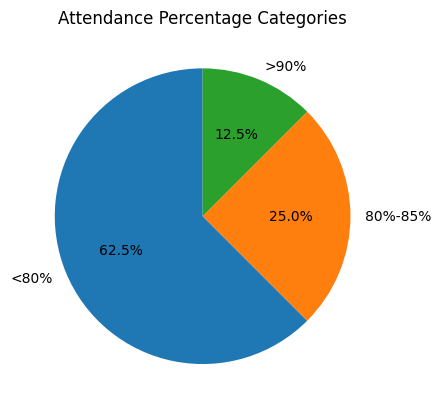

In [27]:
data['Attendance Percentage'] = pd.to_numeric(data['Attendance Percentage'])


below_80 = data['Attendance Percentage'] < 80
between_80_85 = (data['Attendance Percentage'] >= 80) & (data['Attendance Percentage'] <= 85)
above_90 = data['Attendance Percentage'] > 90


counts = [below_80.sum(), between_80_85.sum(), above_90.sum()]
labels = ['<80%', '80%-85%', '>90%']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Attendance Percentage Categories')
plt.show()

Creating a line graph

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
def lineplot_student_performance():
  student_id = input("Enter Student ID to plot: ")

  student_data = data[data['Student ID'] == student_id]

  plt.plot(student_data.index, student_data['Score'], marker='*')
  plt.title(f'Performance Trend for Student ID: {student_id}')
  plt.xlabel('Time')
  plt.ylabel('Score')
  plt.grid(True)
  plt.show()

Menu
1. Plot Student Performance
2. Exit
Enter your choice (1-2): 1
Enter Student ID to plot: 003


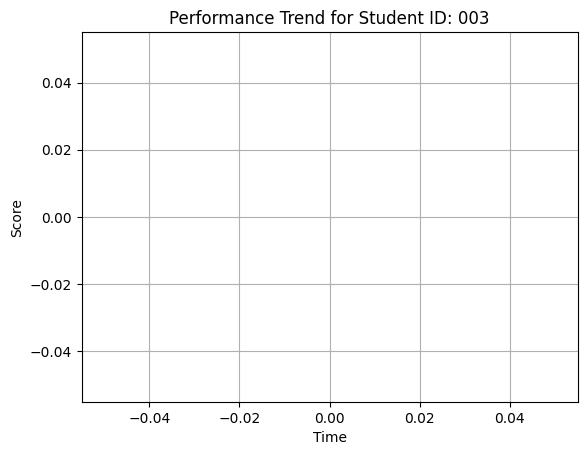

Menu
1. Plot Student Performance
2. Exit
Enter your choice (1-2): 1
Enter Student ID to plot: 001


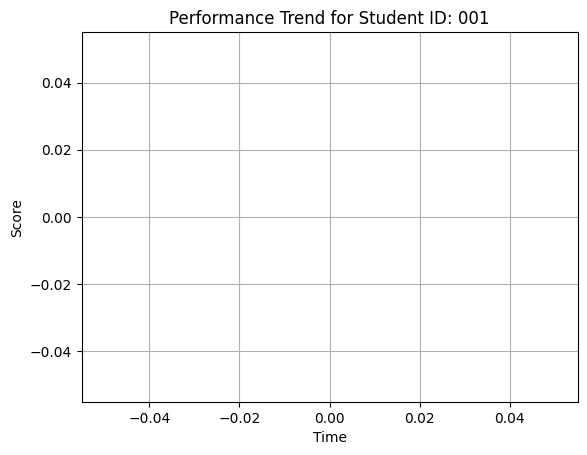

Menu
1. Plot Student Performance
2. Exit
Enter your choice (1-2): 2
Exiting the program


In [30]:
#generate line plot of student
while True:
  print("Menu")
  print("1. Plot Student Performance")
  print("2. Exit")

  choice = input("Enter your choice (1-2): ").strip()

  if choice == "1":
    lineplot_student_performance()
  if choice == "2":
    print("Exiting the program")
    break

**Applying Functions and** **Logic**

Calculating aggregate scores for each student

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv("student_data.csv")

In [33]:
student_stats = data.groupby(['Student ID','Student Name'])['Score'].agg(['mean', 'max', 'min'])
student_stats = student_stats.rename(columns={
    'mean': 'Average Score',
    'max': 'Highest Score',
    'min': 'Lowest Score'
})
print(student_stats)

                         Average Score  Highest Score  Lowest Score
Student ID Student Name                                            
1          Atifa                  82.0             89            75
2          Kafi                   87.5             90            85
3          Nabisha                59.5             65            54
4          Samiya                 64.5             65            64
5          Mofiz                  82.0             82            82


Determining grade (A/B/C/Fail) based on scoring criteria

In [34]:
def assign_grade(score):
       if score >= 85:
           return 'A'
       elif score >= 80:
           return 'B'
       elif score >= 75:
           return 'C'
       else:
           return 'Fail'

In [36]:
data['Grade'] = data['Score'].apply(assign_grade)
print(data)

   Student ID Student Name Subject  Score  Attendance Percentage  \
0           1        Atifa     STA     89                     90   
1           1        Atifa     MAT     75                     80   
2           2         Kafi     SWE     90                    100   
3           2         Kafi     MAT     85                     80   
4           3      Nabisha     BNG     65                     75   
5           3      Nabisha     BBA     54                     60   
6           4       Samiya     EEE     64                     65   
7           4       Samiya     PHY     65                     60   
8           5        Mofiz     MAT     82                     60   

  Assignment Completion Grade  
0                   Yes     A  
1                   Yes     C  
2                    No     A  
3                   Yes     A  
4                    No  Fail  
5                    No  Fail  
6                   Yes  Fail  
7                    No  Fail  
8                   Yes     B  

Generating student performance reports in a user-friendly format.

In [37]:
import pandas as pd

In [45]:
from tabulate import tabulate

In [46]:
def generate_student_report(student_id):
    student_data = data[data['Student ID'] == student_id]

    # Subject-wise Scores Table
    subject_scores = student_data[['Subject', 'Score', 'Grade']]
    subject_scores_table = tabulate(subject_scores, headers='keys', tablefmt='psql')

    report = f"""
    Student Performance Report

    Student ID: {student_id}
    Student Name: {student_data['Student Name'].iloc[0]}

    Subject-wise Scores:
    {subject_scores_table}

    Average Score: {student_data['Score'].mean():.2f}
    Highest Score: {student_data['Score'].max()}
    Lowest Score: {student_data['Score'].min()}
    Attendance Percentage: {student_data['Attendance Percentage'].iloc[0]}%
    Assignment Completion: {student_data['Assignment Completion'].iloc[0]}
    """
    print(report)

In [49]:
student_id = input("Enter Student ID to generate report: ")
generate_student_report(student_id)

KeyboardInterrupt: Interrupted by user